In [ ]:
import numpy as np
from astropy.cosmology import Planck18
import matplotlib.pyplot as plt
from scipy.integrate import quad
from astropy import units as u

In [23]:
H0 = Planck18.H(0)  # Hubble constant in km/s/Mpc
H0_invGyr = H0.to('/Gyr').value # Convert to Gyr^-1
c = 299792.458  # Speed of light in km/s
Omega_m = Planck18.Om0  # Matter density parameter
Omega_l = Planck18.Ode0  # Dark energy density parameter

In [24]:
def integrand(a):
    """Calculate the dimensionless Hubble parameter E(a)"""
    return 1 / (H0_invGyr*a* np.sqrt(Omega_m / a**3 + Omega_l + (1 - Omega_m - Omega_l) / a**2))

def lookback_time(a):
    integral, _ = quad(integrand, a, 1)
    return integral

In [27]:
aarr = np.linspace(0.01, 1, 100)  # Scale factor from 0.01 to 1
tarr = np.array([lookback_time(a) for a in aarr])  # Lookback time in Gyr

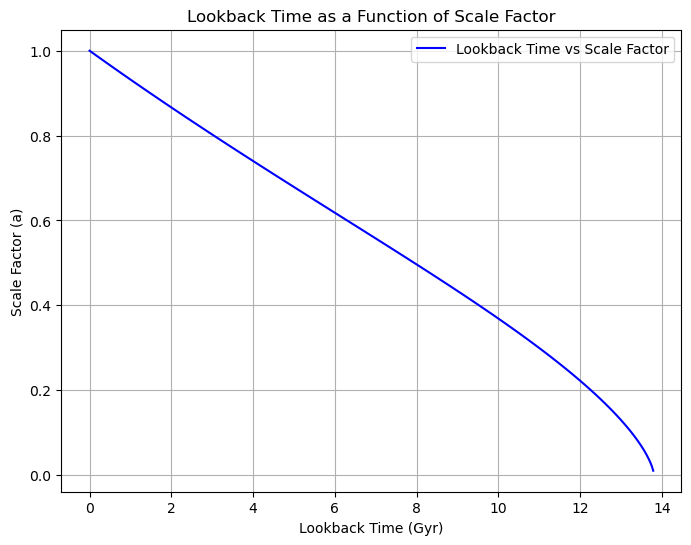

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(tarr, aarr, label='Lookback Time vs Scale Factor', color='blue')
plt.xlabel('Lookback Time (Gyr)')
plt.ylabel('Scale Factor (a)')
plt.title('Lookback Time as a Function of Scale Factor')
plt.grid()
plt.legend()
plt.show()

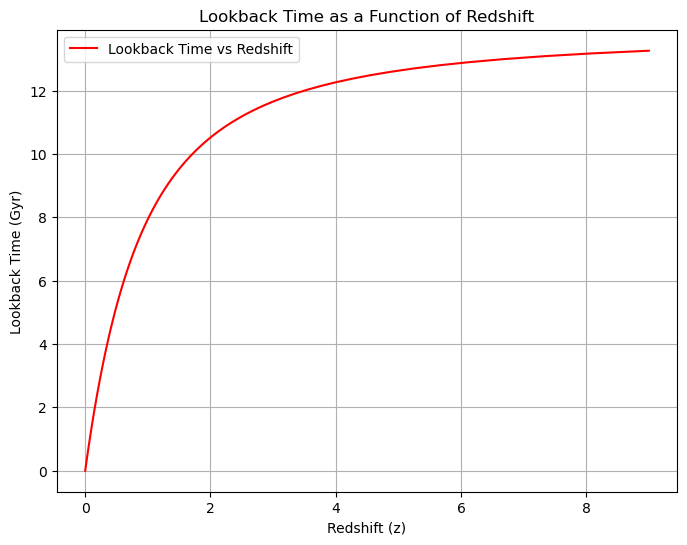

In [31]:
zarr = 1/aarr - 1  # Convert scale factor to redshift
zarr_to_10 = zarr[zarr <= 10]  # Limit to redshift <= 10
tarr_to_10 = tarr[zarr <= 10]  # Corresponding lookback times
plt.figure(figsize=(8, 6))
plt.plot(zarr_to_10, tarr_to_10, label='Lookback Time vs Redshift', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Lookback Time (Gyr)')
plt.title('Lookback Time as a Function of Redshift')
plt.grid()
plt.legend()
plt.show()